# Brewery & Pub Intro Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/7160_1.csv")
df.head()

,address,categories,city,country,key,lat,long,name,phones,postalCode,province,websites
0,407 Radam Ln,brewery,Austin,US,us/tx/austin/407radamln,NaN,NaN,(512) Brewing Co,5127072337,78745,TX,NaN
1,1135 N W Galveston Ave,Brewery and Bar,Bend,US,us/or/bend/1135nwgalvestonave,NaN,NaN,"10 Barrel Brewing Company, 10 Barrel Brewing Co","(541) 585-1007, 5415851007",97703,OR,10barrel.com
2,830 W Bannock St,"brewery, Restaurant, Pub, Brewery, pub, Brewer...",Boise,US,us/id/boise/830wbannockst,43.617711,-116.202883,"10 Barrel Brewing, 10 Barrel Brewing Co.","(208) 344-5870, 2083445870, 2.08344587E9",83702,ID,10barrel.com
3,1022 Texan Trl,"Wine Tours & Tastings, Food & Drink, Tours, Br...",Grapevine,US,us/tx/grapevine/1022texantrl,32.938385,-97.064340,10 Gallon Tours,"18174031832, 817 403-1832",76051,TX,http://www.10gallontours.com/
4,Po Box 135,"American Restaurants, Bar & Grill Restaurants,...",Villard,US,us/mn/villard/pobox135,NaN,NaN,10 Mile Tavern,3205542939,56385,MN,http://www.10miletavern.com


In [4]:
df.province.unique()

array(['TX', 'OR', 'ID', 'MN', 'CA', 'CO', 'WA', 'MI', 'VT', 'NJ', 'DE',
       'NY', 'IN', 'AZ', 'PA', 'WV', 'ME', 'VA', 'KS', 'MO', 'WI', 'MT',
       'FL', 'DC', 'IL', 'KY', 'OK', 'TN', 'AK', 'GA', 'IA', 'AR', 'NH',
       'OH', 'CT', 'MA', 'NC', 'LA', 'AL', 'WY', 'SC', 'NV', 'HI', 'NM',
       'AU-WA', 'NE', 'MD', 'UT', 'ND', 'RI', 'SD', 'Denver', 'AB', 'NL',
       'MS', 'Los Angeles', 'San Diego', 'Pittsburgh', 'St. Louis',
       'Sacramento', 'ON', 'Tampa'], dtype=object)

In [8]:
df

,address,categories,city,country,key,lat,long,name,phones,postalCode,province,websites
0,407 Radam Ln,brewery,Austin,US,us/tx/austin/407radamln,NaN,NaN,(512) Brewing Co,5127072337,78745,TX,NaN
1,1135 N W Galveston Ave,Brewery and Bar,Bend,US,us/or/bend/1135nwgalvestonave,NaN,NaN,"10 Barrel Brewing Company, 10 Barrel Brewing Co","(541) 585-1007, 5415851007",97703,OR,10barrel.com
2,830 W Bannock St,"brewery, Restaurant, Pub, Brewery, pub, Brewer...",Boise,US,us/id/boise/830wbannockst,43.617711,-116.202883,"10 Barrel Brewing, 10 Barrel Brewing Co.","(208) 344-5870, 2083445870, 2.08344587E9",83702,ID,10barrel.com
3,1022 Texan Trl,"Wine Tours & Tastings, Food & Drink, Tours, Br...",Grapevine,US,us/tx/grapevine/1022texantrl,32.938385,-97.064340,10 Gallon Tours,"18174031832, 817 403-1832",76051,TX,http://www.10gallontours.com/
4,Po Box 135,"American Restaurants, Bar & Grill Restaurants,...",Villard,US,us/mn/villard/pobox135,NaN,NaN,10 Mile Tavern,3205542939,56385,MN,http://www.10miletavern.com
...,...,...,...,...,...,...,...,...,...,...,...,...
7370,512 E Main St,Breweries,Montrose,US,us/co/montrose/512emainst/1493666440,38.480219,-107.875247,Zulu Brewing Co,NaN,81401,CO,NaN
7371,3232 Monroe Ave,"Food & Drink, Breweries",Waukegan,US,us/il/waukegan/3232monroeave,42.363495,-87.880620,Zumbier,8474207313,60085,IL,NaN
7372,1038 Lafayette Ave,"Bars & Clubs, Brew Pubs, Restaurants, Brewery,...",Columbus,US,us/in/columbus/1038lafayetteave/56659068,39.208796,-85.918737,Zwanzigz Pizza,8123760200,47201,IN,http://zwanzigz.com
7373,4612 S Mason St,"Performing Arts Venue, Brewery",Fort Collins,US,us/co/fortcollins/4612smasonst/120,NaN,NaN,Zwei Brewing,9702232482,80525,CO,http://zweibrewing.com/default.aspx


In [6]:
print(len(df.categories.unique()))
df.categories.unique()

4323


array(['brewery', 'Brewery and Bar',
       'brewery, Restaurant, Pub, Brewery, pub, Brewery and Pub Downtown Boise City, Brewery and Pub',
       ...,
       'breweries & brew pubs, bar & grill restaurants, Denver, Venues, Bar, Bars & Clubs, Food & Entertainment, Bars & Pubs, Taverns, recreation, food and drink, drinking',
       'Breweries & Brew Pubs, Cocktail Lounges, Bar & Grill Restaurants, Cocktail Lounge Restaurants, Eagle Grove, Restaurants & Bars, Bars / Taverns, Bars',
       'Bars & Clubs, Brew Pubs, Restaurants, Brewery, Catering, Pizza Place, Pizza Place and Brewery'],
      dtype=object)

In [11]:
df.isnull().sum()

address          0
categories       0
city             0
country          0
key              0
lat           1961
long          1959
name             0
phones        1216
postalCode     103
province         0
websites      3827
dtype: int64

In [ ]:
df.shape

(7375, 12)

### Let's get the brewery and pub count per city

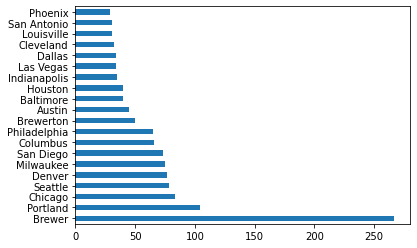

In [12]:
df['city'].value_counts()[:20].plot(kind='barh')

### Let's get the brewery and pub count per province

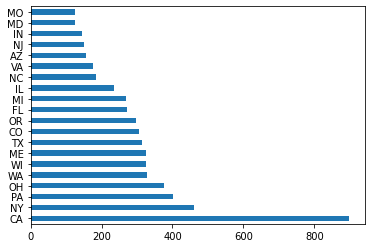

In [13]:
df['province'].value_counts()[:20].plot(kind='barh')

### Now let's check the most popular category of Breweries and Pubs

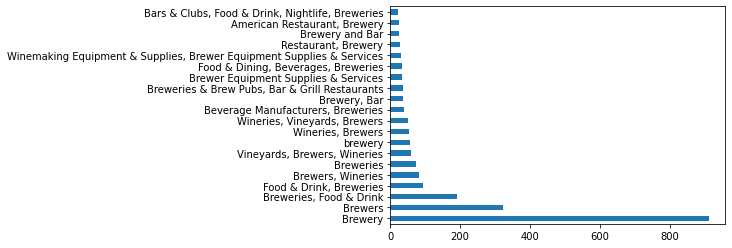

In [ ]:
df['categories'].value_counts()[:20].plot(kind='barh')

### And we can also do a count per postal code

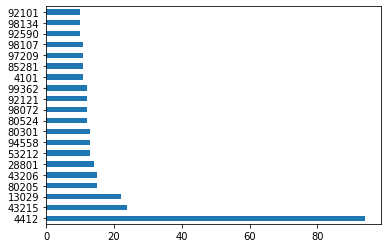

In [14]:
df['postalCode'].value_counts()[:20].plot(kind='barh')

### Doing an analysis per State

In [19]:
brewery_count =  df['postalCode'].value_counts()
brewery_count = brewery_count.reset_index()
brewery_count.columns = ['ZIP', 'Count']
brewery_count['ZIP'] = brewery_count['ZIP'].str[:5]
brewery_count['ZIP'] = brewery_count['ZIP'].apply('{0:0>5}'.format)
brewery_count = brewery_count[brewery_count.ZIP.apply(lambda x: x.isnumeric())]
brewery_count['ZIP'] = brewery_count['ZIP'].astype('int64')
brewery_count.head(10)

,ZIP,Count
0,4412,94
1,43215,24
2,13029,22
3,80205,15
4,43206,15
5,28801,14
6,53212,13
7,94558,13
8,80301,13
9,80524,12


Let's match the zipcodes to States

In [20]:
ziptofip = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/ZIP-COUNTY-FIPS.csv")
ziptofip.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36008,Autauga County,AL,1001,H1
3,36022,Autauga County,AL,1001,H1
4,36051,Autauga County,AL,1001,H1


In [21]:
 brewery_count = brewery_count.merge(ziptofip, on='ZIP' )
 brewery_count.head()

,ZIP,Count,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,4412,94,Penobscot County,ME,23019,H1
1,4412,5,Penobscot County,ME,23019,H1
2,4412,4,Penobscot County,ME,23019,H1
3,4412,4,Penobscot County,ME,23019,H1
4,4412,3,Penobscot County,ME,23019,H1


### Let's get a count of Breweries and Pubs per State

In [22]:
brewery_count.groupby('STATE')['Count'].sum().reset_index().sort_values(by="Count", ascending=False).head(10)

,STATE,Count
4,CA,976
34,NY,563
35,OH,501
38,PA,493
48,WI,467
5,CO,419
43,TX,407
37,OR,372
47,WA,362
22,MI,355


In [23]:
brewery_count_state = brewery_count.groupby('STATE')['Count'].sum().reset_index().sort_values(by="Count", ascending=False)

### Now let's visualize the state counts on a map

In [24]:
import plotly.graph_objects as go

brewery_count_state['text'] = brewery_count_state['STATE'] + '<br>' + \
    'Number of Breweries: ' + brewery_count_state['Count'].astype(str)

fig = go.Figure(data=go.Choropleth(
    locations=brewery_count_state['STATE'],
    z=brewery_count_state['Count'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=True,
    text=brewery_count_state['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Number of Breweries"
))

fig.update_layout(
    title_text='Number of Breweries per State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()